In [1]:
import scipy.io
import torch
import random
import pandas as pd
from src.score_funcs import *
# from Sarcos.kernel import *
from Sarcos.VI_Full_Bayesian_GP_GammaPrior.fb_sarcos_tasks import *
from Sarcos.MCV_sarcos import *
from Sarcos.NCV_sarcos import *

In [3]:
X = torch.load('../X.pt')
y = torch.load('../y.pt')
Xstar = torch.load('../Xstar.pt')
Ystar = torch.load('../ystar.pt')
X = X.float()
y = y.float()
Xstar = Xstar.float()
Ystar = Ystar.float()

In [4]:
# Get the posterior parameters under Gamma Prior
post_mean_etaparms = torch.tensor([-0.1824,  0.1950])
post_cov_etaparms = torch.tensor([[ 0.0029, -0.0025], [-0.0025,  0.0065]])


In [12]:
# MCV
K = 2 #
score_dict  = {'SCORE':multivariate_Normal_score,'mu':post_mean_etaparms.squeeze().unsqueeze(1), 'cov':post_cov_etaparms}
mtr_tasks = fb_Sarcos_Task_Distribution(idces_list = np.arange(0,Xstar.size()[0],2).tolist(), \
                                     X=X, y=y, Xstar=Xstar,Ystar = Ystar,\
                                     post_mean_etaparms=post_mean_etaparms,\
                                     post_cov_etaparms = post_cov_etaparms)
inlr = 1e-2
instep=1#3,5, 10
mCV2_in1 = MetaNeuralCV_Sarcos('sarcos', MetaNeuralCVModel_Sarcos, D_in=2, h_dims=[20] * 5, init_val=torch.tensor([0.]), weight_decay=1.e-10,\
                   tasks=mtr_tasks, inner_optim=torch.optim.Adam, inner_lr=inlr, meta_lr=1e-3, K=K, inner_steps=instep,\
                   tasks_per_meta_batch=1,\
                   **score_dict)
mCV2_in1.main_loop(num_iterations=1000)


mte_tasks = fb_Sarcos_Task_Distribution(idces_list = np.arange(1,Xstar.size()[0],2).tolist(), \
                                        X=X, y=y, Xstar=Xstar, Ystar = Ystar, \
                                        post_mean_etaparms=post_mean_etaparms, \
                                        post_cov_etaparms=post_cov_etaparms)
mCV2_in1.test(mte_tasks, 1000, inner_optim=torch.optim.Adam, inner_steps=instep)

10/1000. loss: 0.12272717785090208
20/1000. loss: 0.07701046038419009
30/1000. loss: 0.05000905767083168
40/1000. loss: 0.0716756522655487
50/1000. loss: 0.09538661651313304
60/1000. loss: 0.055898588709533216
70/1000. loss: 0.08669895372586325
80/1000. loss: 0.07998421881347895
90/1000. loss: 0.04574183709919453
100/1000. loss: 0.07333328207023442
110/1000. loss: 0.07815975276753306
120/1000. loss: 0.06282435487955809
130/1000. loss: 0.09822256034240126
140/1000. loss: 0.06379151362925768
150/1000. loss: 0.07068118248134851
160/1000. loss: 0.05170801542699337
170/1000. loss: 0.06744970789877698
180/1000. loss: 0.07767153196036816
190/1000. loss: 0.06272636391222478
200/1000. loss: 0.09527039206586778
210/1000. loss: 0.06558019020594656
220/1000. loss: 0.06676862391177565
230/1000. loss: 0.061574063962325454
240/1000. loss: 0.06612915955483914
250/1000. loss: 0.06712485952302813
260/1000. loss: 0.08119774269871413
270/1000. loss: 0.06444931700825692
280/1000. loss: 0.06623945841565729


In [13]:
print(np.mean(np.array(mCV2_in1.log_test[0]['Abserr_CVests'])), np.mean(np.array(mCV2_in1.log_test[0]['Abserr_MC_2m_ests'])), np.mean(np.array(mCV2_in1.log_test[0]['Abserr_MCests'])))
print(np.std(np.array(mCV2_in1.log_test[0]['Abserr_CVests'])), np.std(np.array(mCV2_in1.log_test[0]['Abserr_MC_2m_ests'])), np.std(np.array(mCV2_in1.log_test[0]['Abserr_MCests'])))


0.14923145 0.1592512311115861 0.15923144
0.005887427 0.004054473706890898 0.0058874264


In [14]:
# MCV
K = 2 #
score_dict  = {'SCORE':multivariate_Normal_score,'mu':post_mean_etaparms.squeeze().unsqueeze(1), 'cov':post_cov_etaparms}
mtr_tasks = fb_Sarcos_Task_Distribution(idces_list = np.arange(0,Xstar.size()[0],2).tolist(), \
                                     X=X, y=y, Xstar=Xstar,Ystar = Ystar,\
                                     post_mean_etaparms=post_mean_etaparms,\
                                     post_cov_etaparms = post_cov_etaparms)
inlr = 1e-2
instep=3#3,5, 10
mCV2_in3 = MetaNeuralCV_Sarcos('sarcos', MetaNeuralCVModel_Sarcos, D_in=2, h_dims=[20] * 5, init_val=torch.tensor([0.]), weight_decay=1.e-10,\
                   tasks=mtr_tasks, inner_optim=torch.optim.Adam, inner_lr=inlr, meta_lr=1e-3, K=K, inner_steps=instep,\
                   tasks_per_meta_batch=1,\
                   **score_dict)
mCV2_in3.main_loop(num_iterations=1000)


mte_tasks = fb_Sarcos_Task_Distribution(idces_list = np.arange(1,Xstar.size()[0],2).tolist(), \
                                        X=X, y=y, Xstar=Xstar, Ystar = Ystar, \
                                        post_mean_etaparms=post_mean_etaparms, \
                                        post_cov_etaparms=post_cov_etaparms)
mCV2_in3.test(mte_tasks, 1000, inner_optim=torch.optim.Adam, inner_steps=instep)

10/1000. loss: 0.078555116802454
20/1000. loss: 0.07418070957064629
30/1000. loss: 0.08343024533241987
40/1000. loss: 0.09751620218157768
50/1000. loss: 0.07203553579747676
60/1000. loss: 0.04839876415207982
70/1000. loss: 0.0558851232752204
80/1000. loss: 0.08209479628130793
90/1000. loss: 0.07036909908056259
100/1000. loss: 0.07898020355496556
110/1000. loss: 0.05693059439072386
120/1000. loss: 0.07115800697356463
130/1000. loss: 0.0458896679803729
140/1000. loss: 0.04146935935132205
150/1000. loss: 0.0919914144091308
160/1000. loss: 0.05956683801487088
170/1000. loss: 0.0503918468952179
180/1000. loss: 0.06666002627462149
190/1000. loss: 0.09593760836869478
200/1000. loss: 0.09346240963786841
210/1000. loss: 0.06374867837876082
220/1000. loss: 0.04198868226958439
230/1000. loss: 0.06390513572841883
240/1000. loss: 0.08246900304220617
250/1000. loss: 0.038923510431777684
260/1000. loss: 0.054740867018699645
270/1000. loss: 0.048075427413095895
280/1000. loss: 0.032724004611372946
290

In [15]:
print(np.mean(np.array(mCV2_in3.log_test[0]['Abserr_CVests'])), np.mean(np.array(mCV2_in3.log_test[0]['Abserr_MC_2m_ests'])), np.mean(np.array(mCV2_in3.log_test[0]['Abserr_MCests'])))
print(np.std(np.array(mCV2_in3.log_test[0]['Abserr_CVests'])), np.std(np.array(mCV2_in3.log_test[0]['Abserr_MC_2m_ests'])), np.std(np.array(mCV2_in3.log_test[0]['Abserr_MCests'])))


0.12976691 0.15966407983005046 0.15969275
0.005558297 0.003924193252161896 0.005558275


In [16]:
# MCV
K = 2 #
score_dict  = {'SCORE':multivariate_Normal_score,'mu':post_mean_etaparms.squeeze().unsqueeze(1), 'cov':post_cov_etaparms}
mtr_tasks = fb_Sarcos_Task_Distribution(idces_list = np.arange(0,Xstar.size()[0],2).tolist(), \
                                     X=X, y=y, Xstar=Xstar,Ystar = Ystar,\
                                     post_mean_etaparms=post_mean_etaparms,\
                                     post_cov_etaparms = post_cov_etaparms)
inlr = 1e-2
instep=5#3,5, 10
mCV2_in5 = MetaNeuralCV_Sarcos('sarcos', MetaNeuralCVModel_Sarcos, D_in=2, h_dims=[20] * 5, init_val=torch.tensor([0.]), weight_decay=1.e-10,\
                   tasks=mtr_tasks, inner_optim=torch.optim.Adam, inner_lr=inlr, meta_lr=1e-3, K=K, inner_steps=instep,\
                   tasks_per_meta_batch=1,\
                   **score_dict)
mCV2_in5.main_loop(num_iterations=1000)


mte_tasks = fb_Sarcos_Task_Distribution(idces_list = np.arange(1,Xstar.size()[0],2).tolist(), \
                                        X=X, y=y, Xstar=Xstar, Ystar = Ystar, \
                                        post_mean_etaparms=post_mean_etaparms, \
                                        post_cov_etaparms=post_cov_etaparms)
mCV2_in5.test(mte_tasks, 1000, inner_optim=torch.optim.Adam, inner_steps=instep)

10/1000. loss: 0.051895225699990985
20/1000. loss: 0.07964392192661762
30/1000. loss: 0.07152515118941664
40/1000. loss: 0.12092707641422748
50/1000. loss: 0.0765197690576315
60/1000. loss: 0.0562927482649684
70/1000. loss: 0.07200589622370898
80/1000. loss: 0.06629946455359459
90/1000. loss: 0.06449131155386567
100/1000. loss: 0.06065576197579503
110/1000. loss: 0.04458095487207174
120/1000. loss: 0.058398327836766836
130/1000. loss: 0.0422997540794313
140/1000. loss: 0.06231713509187102
150/1000. loss: 0.05576504179043695
160/1000. loss: 0.06113377157598734
170/1000. loss: 0.10323394695296884
180/1000. loss: 0.05628378707915545
190/1000. loss: 0.0875778479501605
200/1000. loss: 0.0979546632617712
210/1000. loss: 0.03752139527350664
220/1000. loss: 0.042884359590243545
230/1000. loss: 0.11481756018474698
240/1000. loss: 0.038529196241870525
250/1000. loss: 0.03442835161986295
260/1000. loss: 0.0999752264469862
270/1000. loss: 0.0729851683601737
280/1000. loss: 0.043541217548772694
290

In [17]:
print(np.mean(np.array(mCV2_in5.log_test[0]['Abserr_CVests'])), np.mean(np.array(mCV2_in5.log_test[0]['Abserr_MC_2m_ests'])), np.mean(np.array(mCV2_in5.log_test[0]['Abserr_MCests'])))
print(np.std(np.array(mCV2_in5.log_test[0]['Abserr_CVests'])), np.std(np.array(mCV2_in5.log_test[0]['Abserr_MC_2m_ests'])), np.std(np.array(mCV2_in5.log_test[0]['Abserr_MCests'])))

0.10977061 0.15940734320133926 0.1594147
0.005851718 0.0041006906690233425 0.005851675


In [18]:
# MCV
K = 2 #
score_dict  = {'SCORE':multivariate_Normal_score,'mu':post_mean_etaparms.squeeze().unsqueeze(1), 'cov':post_cov_etaparms}
mtr_tasks = fb_Sarcos_Task_Distribution(idces_list = np.arange(0,Xstar.size()[0],2).tolist(), \
                                     X=X, y=y, Xstar=Xstar,Ystar = Ystar,\
                                     post_mean_etaparms=post_mean_etaparms,\
                                     post_cov_etaparms = post_cov_etaparms)
inlr = 1e-2
instep=10#3,5, 10
mCV2_in10 = MetaNeuralCV_Sarcos('sarcos', MetaNeuralCVModel_Sarcos, D_in=2, h_dims=[20] * 5, init_val=torch.tensor([0.]), weight_decay=1.e-10,\
                   tasks=mtr_tasks, inner_optim=torch.optim.Adam, inner_lr=inlr, meta_lr=1e-3, K=K, inner_steps=instep,\
                   tasks_per_meta_batch=1,\
                   **score_dict)
mCV2_in10.main_loop(num_iterations=1000)


mte_tasks = fb_Sarcos_Task_Distribution(idces_list = np.arange(1,Xstar.size()[0],2).tolist(), \
                                        X=X, y=y, Xstar=Xstar, Ystar = Ystar, \
                                        post_mean_etaparms=post_mean_etaparms, \
                                        post_cov_etaparms=post_cov_etaparms)
mCV2_in10.test(mte_tasks, 1000, inner_optim=torch.optim.Adam, inner_steps=instep)


10/1000. loss: 0.08020533565431834
20/1000. loss: 0.06063125859946013
30/1000. loss: 0.061576589941978455
40/1000. loss: 0.06253274343907833
50/1000. loss: 0.02571565271355212
60/1000. loss: 0.05282871407616767
70/1000. loss: 0.0483005415648222
80/1000. loss: 0.033420546492561695
90/1000. loss: 0.03430273463018239
100/1000. loss: 0.03308962685987353
110/1000. loss: 0.03505621640942991
120/1000. loss: 0.053261927282437685
130/1000. loss: 0.05238195885904133
140/1000. loss: 0.02617351644439623
150/1000. loss: 0.07084019538015127
160/1000. loss: 0.049648961969069205
170/1000. loss: 0.022771488520083948
180/1000. loss: 0.04271064666099846
190/1000. loss: 0.06371424323879182
200/1000. loss: 0.03793038744624937
210/1000. loss: 0.04739910529460758
220/1000. loss: 0.03615016881376505
230/1000. loss: 0.033439099509269
240/1000. loss: 0.04281724644824862
250/1000. loss: 0.03202852746471763
260/1000. loss: 0.08931994568556548
270/1000. loss: 0.04730544947087765
280/1000. loss: 0.05770255583338439

In [19]:
print(np.mean(np.array(mCV2_in10.log_test[0]['Abserr_CVests'])), np.mean(np.array(mCV2_in10.log_test[0]['Abserr_MC_2m_ests'])), np.mean(np.array(mCV2_in10.log_test[0]['Abserr_MCests'])))
print(np.std(np.array(mCV2_in10.log_test[0]['Abserr_CVests'])), np.std(np.array(mCV2_in10.log_test[0]['Abserr_MC_2m_ests'])), np.std(np.array(mCV2_in10.log_test[0]['Abserr_MCests'])))

0.062626116 0.15928533850610258 0.1594457
0.0057943533 0.004215711292267412 0.0057912664


In [20]:
# MCV
K = 2 #
score_dict  = {'SCORE':multivariate_Normal_score,'mu':post_mean_etaparms.squeeze().unsqueeze(1), 'cov':post_cov_etaparms}
mtr_tasks = fb_Sarcos_Task_Distribution(idces_list = np.arange(0,Xstar.size()[0],2).tolist(), \
                                     X=X, y=y, Xstar=Xstar,Ystar = Ystar,\
                                     post_mean_etaparms=post_mean_etaparms,\
                                     post_cov_etaparms = post_cov_etaparms)
inlr = 1e-2
instep=20#3,5, 10
mCV2_in20 = MetaNeuralCV_Sarcos('sarcos', MetaNeuralCVModel_Sarcos, D_in=2, h_dims=[20] * 5, init_val=torch.tensor([0.]), weight_decay=1.e-10,\
                   tasks=mtr_tasks, inner_optim=torch.optim.Adam, inner_lr=inlr, meta_lr=1e-3, K=K, inner_steps=instep,\
                   tasks_per_meta_batch=1,\
                   **score_dict)
mCV2_in20.main_loop(num_iterations=1000)


mte_tasks = fb_Sarcos_Task_Distribution(idces_list = np.arange(1,Xstar.size()[0],2).tolist(), \
                                        X=X, y=y, Xstar=Xstar, Ystar = Ystar, \
                                        post_mean_etaparms=post_mean_etaparms, \
                                        post_cov_etaparms=post_cov_etaparms)
mCV2_in20.test(mte_tasks, 1000, inner_optim=torch.optim.Adam, inner_steps=instep)


10/1000. loss: 0.036357486562337726
20/1000. loss: 0.06220522387884557
30/1000. loss: 0.06087602967163548
40/1000. loss: 0.033170005097053944
50/1000. loss: 0.02653893094502564
60/1000. loss: 0.06909636503551156
70/1000. loss: 0.05466176415793598
80/1000. loss: 0.02288009006721836
90/1000. loss: 0.025554398144595324
100/1000. loss: 0.06468317441176623
110/1000. loss: 0.04129421289544553
120/1000. loss: 0.04944694647565484
130/1000. loss: 0.022979769139783456
140/1000. loss: 0.026998117612674833
150/1000. loss: 0.0372849051724188
160/1000. loss: 0.026956145552685485
170/1000. loss: 0.040544056054204705
180/1000. loss: 0.026090635923901574
190/1000. loss: 0.04295600648038089
200/1000. loss: 0.03103473982773721
210/1000. loss: 0.03392775822430849
220/1000. loss: 0.028252401342615484
230/1000. loss: 0.027816797036211937
240/1000. loss: 0.037202060455456376
250/1000. loss: 0.02418154417537153
260/1000. loss: 0.023526060325093568
270/1000. loss: 0.01844258642377099
280/1000. loss: 0.01762196

In [21]:
print(np.mean(np.array(mCV2_in20.log_test[0]['Abserr_CVests'])), np.mean(np.array(mCV2_in20.log_test[0]['Abserr_MC_2m_ests'])), np.mean(np.array(mCV2_in20.log_test[0]['Abserr_MCests'])))
print(np.std(np.array(mCV2_in20.log_test[0]['Abserr_CVests'])), np.std(np.array(mCV2_in20.log_test[0]['Abserr_MC_2m_ests'])), np.std(np.array(mCV2_in20.log_test[0]['Abserr_MCests'])))

0.0057420568 0.1594898715764284 0.15943384
0.0051471377 0.0038589452993143245 0.0055562854


In [22]:
# MCV
K = 2 #
score_dict  = {'SCORE':multivariate_Normal_score,'mu':post_mean_etaparms.squeeze().unsqueeze(1), 'cov':post_cov_etaparms}
mtr_tasks = fb_Sarcos_Task_Distribution(idces_list = np.arange(0,Xstar.size()[0],2).tolist(), \
                                     X=X, y=y, Xstar=Xstar,Ystar = Ystar,\
                                     post_mean_etaparms=post_mean_etaparms,\
                                     post_cov_etaparms = post_cov_etaparms)
inlr = 1e-2
instep=25
mCV2_in25 = MetaNeuralCV_Sarcos('sarcos', MetaNeuralCVModel_Sarcos, D_in=2, h_dims=[20] * 5, init_val=torch.tensor([0.]), weight_decay=1.e-10,\
                   tasks=mtr_tasks, inner_optim=torch.optim.Adam, inner_lr=inlr, meta_lr=1e-3, K=K, inner_steps=instep,\
                   tasks_per_meta_batch=1,\
                   **score_dict)
mCV2_in25.main_loop(num_iterations=1000)


mte_tasks = fb_Sarcos_Task_Distribution(idces_list = np.arange(1,Xstar.size()[0],2).tolist(), \
                                        X=X, y=y, Xstar=Xstar, Ystar = Ystar, \
                                        post_mean_etaparms=post_mean_etaparms, \
                                        post_cov_etaparms=post_cov_etaparms)
mCV2_in25.test(mte_tasks, 1000, inner_optim=torch.optim.Adam, inner_steps=instep)


10/1000. loss: 0.029120651149423794
20/1000. loss: 0.02997777374985162
30/1000. loss: 0.053079637512564656
40/1000. loss: 0.04174824203364551
50/1000. loss: 0.016877608303911985
60/1000. loss: 0.05703279934823513
70/1000. loss: 0.02484602852491662
80/1000. loss: 0.02273039990104735
90/1000. loss: 0.037668263784144077
100/1000. loss: 0.03656629551551305
110/1000. loss: 0.038846017234027384
120/1000. loss: 0.028492039162665607
130/1000. loss: 0.013910665758885443
140/1000. loss: 0.03105826531536877
150/1000. loss: 0.01818911705922801
160/1000. loss: 0.04014293639920652
170/1000. loss: 0.017202526482287796
180/1000. loss: 0.01753322287113406
190/1000. loss: 0.03567513055168092
200/1000. loss: 0.041392372781410815
210/1000. loss: 0.029290491435676812
220/1000. loss: 0.024411782569950448
230/1000. loss: 0.04006162855657749
240/1000. loss: 0.03136337806936353
250/1000. loss: 0.024777659855317324
260/1000. loss: 0.02079907056177035
270/1000. loss: 0.012987089750822634
280/1000. loss: 0.015213

In [23]:
print(np.mean(np.array(mCV2_in25.log_test[0]['Abserr_CVests'])), np.mean(np.array(mCV2_in25.log_test[0]['Abserr_MC_2m_ests'])), np.mean(np.array(mCV2_in25.log_test[0]['Abserr_MCests'])))
print(np.std(np.array(mCV2_in25.log_test[0]['Abserr_CVests'])), np.std(np.array(mCV2_in25.log_test[0]['Abserr_MC_2m_ests'])), np.std(np.array(mCV2_in25.log_test[0]['Abserr_MCests'])))

0.017973552 0.15915678701549768 0.15896991
0.0074126287 0.004363755613329298 0.0061041433


In [24]:
# MCV
K = 2 #
score_dict  = {'SCORE':multivariate_Normal_score,'mu':post_mean_etaparms.squeeze().unsqueeze(1), 'cov':post_cov_etaparms}
mtr_tasks = fb_Sarcos_Task_Distribution(idces_list = np.arange(0,Xstar.size()[0],2).tolist(), \
                                     X=X, y=y, Xstar=Xstar,Ystar = Ystar,\
                                     post_mean_etaparms=post_mean_etaparms,\
                                     post_cov_etaparms = post_cov_etaparms)
inlr = 1e-2
instep=30
mCV2_in30 = MetaNeuralCV_Sarcos('sarcos', MetaNeuralCVModel_Sarcos, D_in=2, h_dims=[20] * 5, init_val=torch.tensor([0.]), weight_decay=1.e-10,\
                   tasks=mtr_tasks, inner_optim=torch.optim.Adam, inner_lr=inlr, meta_lr=1e-3, K=K, inner_steps=instep,\
                   tasks_per_meta_batch=1,\
                   **score_dict)
mCV2_in30.main_loop(num_iterations=1000)


mte_tasks = fb_Sarcos_Task_Distribution(idces_list = np.arange(1,Xstar.size()[0],2).tolist(), \
                                        X=X, y=y, Xstar=Xstar, Ystar = Ystar, \
                                        post_mean_etaparms=post_mean_etaparms, \
                                        post_cov_etaparms=post_cov_etaparms)
mCV2_in30.test(mte_tasks, 1000, inner_optim=torch.optim.Adam, inner_steps=instep)


10/1000. loss: 0.023806059407070278
20/1000. loss: 0.03092534621246159
30/1000. loss: 0.034899131755810234
40/1000. loss: 0.011459894094150514
50/1000. loss: 0.029621966823469847
60/1000. loss: 0.04301845242807758
70/1000. loss: 0.016395817254669966
80/1000. loss: 0.018379548110533505
90/1000. loss: 0.031630313908681276
100/1000. loss: 0.03223215614416404
110/1000. loss: 0.013286942127160728
120/1000. loss: 0.019574643205851318
130/1000. loss: 0.014805248170159758
140/1000. loss: 0.020695549342781304
150/1000. loss: 0.016160021210089325
160/1000. loss: 0.020456647220999002
170/1000. loss: 0.020630899391835555
180/1000. loss: 0.020989135285344674
190/1000. loss: 0.023643701511900872
200/1000. loss: 0.04115375350229442
210/1000. loss: 0.04285261249169707
220/1000. loss: 0.052118598239030686
230/1000. loss: 0.03448266328778118
240/1000. loss: 0.023653070541331544
250/1000. loss: 0.02993094306439161
260/1000. loss: 0.012531034019775688
270/1000. loss: 0.025688286917284132
280/1000. loss: 0

In [25]:
print(np.mean(np.array(mCV2_in30.log_test[0]['Abserr_CVests'])), np.mean(np.array(mCV2_in30.log_test[0]['Abserr_MC_2m_ests'])), np.mean(np.array(mCV2_in30.log_test[0]['Abserr_MCests'])))
print(np.std(np.array(mCV2_in30.log_test[0]['Abserr_CVests'])), np.std(np.array(mCV2_in30.log_test[0]['Abserr_MC_2m_ests'])), np.std(np.array(mCV2_in30.log_test[0]['Abserr_MCests'])))

0.00752345 0.15933128517121076 0.15927885
0.0063622408 0.004179997915915983 0.005999889


In [40]:
# MCV
K = 2 #
score_dict  = {'SCORE':multivariate_Normal_score,'mu':post_mean_etaparms.squeeze().unsqueeze(1), 'cov':post_cov_etaparms}
mtr_tasks = fb_Sarcos_Task_Distribution(idces_list = np.arange(0,Xstar.size()[0],2).tolist(), \
                                     X=X, y=y, Xstar=Xstar,Ystar = Ystar,\
                                     post_mean_etaparms=post_mean_etaparms,\
                                     post_cov_etaparms = post_cov_etaparms)
inlr = 1e-2
instep=40
mCV2_in40 = MetaNeuralCV_Sarcos('sarcos', MetaNeuralCVModel_Sarcos, D_in=2, h_dims=[20] * 5, init_val=torch.tensor([0.]), weight_decay=1.e-10,\
                   tasks=mtr_tasks, inner_optim=torch.optim.Adam, inner_lr=inlr, meta_lr=1e-3, K=K, inner_steps=instep,\
                   tasks_per_meta_batch=1,\
                   **score_dict)
mCV2_in40.main_loop(num_iterations=1000)


mte_tasks = fb_Sarcos_Task_Distribution(idces_list = np.arange(1,Xstar.size()[0],2).tolist(), \
                                        X=X, y=y, Xstar=Xstar, Ystar = Ystar, \
                                        post_mean_etaparms=post_mean_etaparms, \
                                        post_cov_etaparms=post_cov_etaparms)
mCV2_in40.test(mte_tasks, 1000, inner_optim=torch.optim.Adam, inner_steps=instep)

10/1000. loss: 0.013175570266321301
20/1000. loss: 0.01876698969863355
30/1000. loss: 0.028634242666885256
40/1000. loss: 0.00735176229645731
50/1000. loss: 0.018986013438552617
60/1000. loss: 0.01712993923574686
70/1000. loss: 0.010219748667441308
80/1000. loss: 0.01810499273124151
90/1000. loss: 0.027024101460119708
100/1000. loss: 0.02769233430735767
110/1000. loss: 0.030611886427504943
120/1000. loss: 0.027175708254799247
130/1000. loss: 0.022330200159922244
140/1000. loss: 0.03433040490922394
150/1000. loss: 0.026443563215434552
160/1000. loss: 0.02728519068332389
170/1000. loss: 0.018602855002973227
180/1000. loss: 0.014683249150402844
190/1000. loss: 0.020514632109552622
200/1000. loss: 0.03859647729550488
210/1000. loss: 0.010194943798705936
220/1000. loss: 0.03767291568219662
230/1000. loss: 0.018795739195775242
240/1000. loss: 0.0236847598629538
250/1000. loss: 0.012110380244848784
260/1000. loss: 0.027641971223056318
270/1000. loss: 0.02835499686188996
280/1000. loss: 0.0218

In [41]:
print(np.mean(np.array(mCV2_in40.log_test[0]['Abserr_CVests'])), np.mean(np.array(mCV2_in40.log_test[0]['Abserr_MC_2m_ests'])), np.mean(np.array(mCV2_in40.log_test[0]['Abserr_MCests'])))
print(np.std(np.array(mCV2_in40.log_test[0]['Abserr_CVests'])), np.std(np.array(mCV2_in40.log_test[0]['Abserr_MC_2m_ests'])), np.std(np.array(mCV2_in40.log_test[0]['Abserr_MCests'])))

0.054657105 0.1594367768391967 0.15951584
0.008883801 0.004128973033051469 0.0058014067


In [63]:
# MCV
K = 2 #
score_dict  = {'SCORE':multivariate_Normal_score,'mu':post_mean_etaparms.squeeze().unsqueeze(1), 'cov':post_cov_etaparms}
mtr_tasks = fb_Sarcos_Task_Distribution(idces_list = np.arange(0,Xstar.size()[0],2).tolist(), \
                                     X=X, y=y, Xstar=Xstar,Ystar = Ystar,\
                                     post_mean_etaparms=post_mean_etaparms,\
                                     post_cov_etaparms = post_cov_etaparms)
inlr = 1e-2
instep=50
mCV2_in50 = MetaNeuralCV_Sarcos('sarcos', MetaNeuralCVModel_Sarcos, D_in=2, h_dims=[20] * 5, init_val=torch.tensor([0.]), weight_decay=1.e-10,\
                   tasks=mtr_tasks, inner_optim=torch.optim.Adam, inner_lr=inlr, meta_lr=1e-3, K=K, inner_steps=instep,\
                   tasks_per_meta_batch=1,\
                   **score_dict)
mCV2_in50.main_loop(num_iterations=1000)


mte_tasks = fb_Sarcos_Task_Distribution(idces_list = np.arange(1,Xstar.size()[0],2).tolist(), \
                                        X=X, y=y, Xstar=Xstar, Ystar = Ystar, \
                                        post_mean_etaparms=post_mean_etaparms, \
                                        post_cov_etaparms=post_cov_etaparms)
mCV2_in50.test(mte_tasks, 1000, inner_optim=torch.optim.Adam, inner_steps=instep)

10/1000. loss: 0.022118426067754625
20/1000. loss: 0.020957201078999788
30/1000. loss: 0.022889323142590002
40/1000. loss: 0.015994002394290874
50/1000. loss: 0.02579749867800274
60/1000. loss: 0.03559591381344944
70/1000. loss: 0.024477261025458573
80/1000. loss: 0.020421421818900852
90/1000. loss: 0.014902290015015751
100/1000. loss: 0.01886163341696374
110/1000. loss: 0.023119212145684288
120/1000. loss: 0.03988951460923999
130/1000. loss: 0.024845115130301566
140/1000. loss: 0.03867914490401745
150/1000. loss: 0.02142256237566471
160/1000. loss: 0.024210593907628208
170/1000. loss: 0.018267837096937002
180/1000. loss: 0.01606807974167168
190/1000. loss: 0.01839195884531364
200/1000. loss: 0.022626411053352058
210/1000. loss: 0.01894130071159452
220/1000. loss: 0.02633169391192496
230/1000. loss: 0.04458813071832992
240/1000. loss: 0.019500426470767707
250/1000. loss: 0.021660424559377132
260/1000. loss: 0.029715977353043856
270/1000. loss: 0.019331285543739796
280/1000. loss: 0.041

In [64]:
print(np.mean(np.array(mCV2_in50.log_test[0]['Abserr_CVests'])), np.mean(np.array(mCV2_in50.log_test[0]['Abserr_MC_2m_ests'])), np.mean(np.array(mCV2_in50.log_test[0]['Abserr_MCests'])))
print(np.std(np.array(mCV2_in50.log_test[0]['Abserr_CVests'])), np.std(np.array(mCV2_in50.log_test[0]['Abserr_MC_2m_ests'])), np.std(np.array(mCV2_in50.log_test[0]['Abserr_MCests'])))

0.075041875 0.1591576215028763 0.15901798
0.008772239 0.004199390246452833 0.005912713


In [71]:
# MCV
K = 2 #
score_dict  = {'SCORE':multivariate_Normal_score,'mu':post_mean_etaparms.squeeze().unsqueeze(1), 'cov':post_cov_etaparms}
mtr_tasks = fb_Sarcos_Task_Distribution(idces_list = np.arange(0,Xstar.size()[0],2).tolist(), \
                                     X=X, y=y, Xstar=Xstar,Ystar = Ystar,\
                                     post_mean_etaparms=post_mean_etaparms,\
                                     post_cov_etaparms = post_cov_etaparms)
inlr = 1e-2
instep=100
mCV2_in100 = MetaNeuralCV_Sarcos('sarcos', MetaNeuralCVModel_Sarcos, D_in=2, h_dims=[20] * 5, init_val=torch.tensor([0.]), weight_decay=1.e-10,\
                   tasks=mtr_tasks, inner_optim=torch.optim.Adam, inner_lr=inlr, meta_lr=1e-3, K=K, inner_steps=instep,\
                   tasks_per_meta_batch=1,\
                   **score_dict)
mCV2_in100.main_loop(num_iterations=1000)


mte_tasks = fb_Sarcos_Task_Distribution(idces_list = np.arange(1,Xstar.size()[0],2).tolist(), \
                                        X=X, y=y, Xstar=Xstar, Ystar = Ystar, \
                                        post_mean_etaparms=post_mean_etaparms, \
                                        post_cov_etaparms=post_cov_etaparms)
mCV2_in100.test(mte_tasks, 1000, inner_optim=torch.optim.Adam, inner_steps=instep)

10/1000. loss: 0.025168134924024345
20/1000. loss: 0.017022544285282493
30/1000. loss: 0.02788091139009339
40/1000. loss: 0.07217605398036539
50/1000. loss: 0.03523556631989777
60/1000. loss: 0.029441516473889352
70/1000. loss: 0.035764300636947154
80/1000. loss: 0.021732055084430612
90/1000. loss: 0.01628183394932421
100/1000. loss: 0.02301000626757741
110/1000. loss: 0.027613211545394735
120/1000. loss: 0.02213441260973923
130/1000. loss: 0.02584303012408782
140/1000. loss: 0.03688185131177306
150/1000. loss: 0.026067245239391922
160/1000. loss: 0.017940887180157006
170/1000. loss: 0.026210229541175068
180/1000. loss: 0.019547530467389152
190/1000. loss: 0.0268039827584289
200/1000. loss: 0.023688175500137732
210/1000. loss: 0.014904406387358904
220/1000. loss: 0.02742090465617366
230/1000. loss: 0.017795369820669295
240/1000. loss: 0.02500834073871374
250/1000. loss: 0.021414983211434445
260/1000. loss: 0.024095340462918103
270/1000. loss: 0.03844932029023766
280/1000. loss: 0.01426

In [72]:
print(np.mean(np.array(mCV2_in100.log_test[0]['Abserr_CVests'])), np.mean(np.array(mCV2_in100.log_test[0]['Abserr_MC_2m_ests'])), np.mean(np.array(mCV2_in100.log_test[0]['Abserr_MCests'])))
print(np.std(np.array(mCV2_in100.log_test[0]['Abserr_CVests'])), np.std(np.array(mCV2_in100.log_test[0]['Abserr_MC_2m_ests'])), np.std(np.array(mCV2_in100.log_test[0]['Abserr_MCests'])))

0.10949832 0.15942809652537107 0.15973136
0.007997098 0.004069133625362981 0.0054302136


In [26]:
# # NCV
K = 2 #
score_dict  = {'SCORE':multivariate_Normal_score,'mu':post_mean_etaparms.squeeze().unsqueeze(1), 'cov':post_cov_etaparms}
mte_tasks = fb_Sarcos_Task_Distribution(idces_list = np.arange(1,Xstar.size()[0],2).tolist(), \
                                        X=X, y=y, Xstar=Xstar, Ystar = Ystar, \
                                        post_mean_etaparms=post_mean_etaparms, \
                                        post_cov_etaparms=post_cov_etaparms)
out2 = torch.zeros(1000,2)
for i in range(1000):
    if i%10 ==0:
        print('{}/{}'.format(i+1,1000))
    nCV = NeuralCV_Sarcos('sarcos', NeuralCVModel_Sarcos, D_in=2, h_dims=[20] * 5, init_val=torch.tensor([0.]), weight_decay=1.e-10,\
                   tasks=mte_tasks, optim=torch.optim.Adam, lr=1e-3, K=K,
                   **score_dict)
    __ = nCV.train_val(num_epochs=20, batch_size=5, verbose=False)
    out2[i,0] = torch.tensor(__[0])
    out2[i,1] = torch.tensor(__[1])


1/1000
11/1000
21/1000
31/1000
41/1000
51/1000
61/1000
71/1000
81/1000
91/1000
101/1000
111/1000
121/1000
131/1000
141/1000
151/1000
161/1000
171/1000
181/1000
191/1000
201/1000
211/1000
221/1000
231/1000
241/1000
251/1000
261/1000
271/1000
281/1000
291/1000
301/1000
311/1000
321/1000
331/1000
341/1000
351/1000
361/1000
371/1000
381/1000
391/1000
401/1000
411/1000
421/1000
431/1000
441/1000
451/1000
461/1000
471/1000
481/1000
491/1000
501/1000
511/1000
521/1000
531/1000
541/1000
551/1000
561/1000
571/1000
581/1000
591/1000
601/1000
611/1000
621/1000
631/1000
641/1000
651/1000
661/1000
671/1000
681/1000
691/1000
701/1000
711/1000
721/1000
731/1000
741/1000
751/1000
761/1000
771/1000
781/1000
791/1000
801/1000
811/1000
821/1000
831/1000
841/1000
851/1000
861/1000
871/1000
881/1000
891/1000
901/1000
911/1000
921/1000
931/1000
941/1000
951/1000
961/1000
971/1000
981/1000
991/1000


In [27]:
print(out2.mean(0)) #mc, ncv
print(out2.std(0)) #mc, ncv

tensor([0.1591, 0.1590])
tensor([0.0043, 0.0060])


In [73]:
import pandas as pd
no_tasks = 1000
set_of_insteps = [1,3,5,10, 20,25,30,40, 50,100]
no_insteps = len(set_of_insteps)

In [74]:
nCV_log = out2
for i in range(no_insteps):

    if set_of_insteps[i] == 1:
        mCV_log = mCV2_in1

    elif set_of_insteps[i] == 3:
        mCV_log = mCV2_in3

    elif set_of_insteps[i] == 5:
        mCV_log = mCV2_in5

    elif set_of_insteps[i] == 10:
        mCV_log = mCV2_in10

    elif set_of_insteps[i] == 20:
        mCV_log = mCV2_in20

    elif set_of_insteps[i] == 25:
        mCV_log = mCV2_in25

    elif set_of_insteps[i] == 30:
        mCV_log = mCV2_in30

    elif set_of_insteps[i] == 40:
        mCV_log = mCV2_in40

    elif set_of_insteps[i] == 50:
        mCV_log = mCV2_in50

    elif set_of_insteps[i] == 100:
        mCV_log = mCV2_in100


    cur_MCV_data = list(zip(np.array(mCV_log.log_test[0]['Abserr_CVests']), np.repeat('MCV-{}'.format(set_of_insteps[i]), no_tasks), np.repeat("N={}".format(set_of_insteps[i]), no_tasks)))
    cur_MCV_data_df = pd.DataFrame(data=cur_MCV_data, columns=['est_abserr', 'method', 'num_inner_steps'])
    if i == 0:
        MCV_data_df = cur_MCV_data_df
    if i >= 1:
        MCV_data_df = MCV_data_df.append(cur_MCV_data_df)


    # NCV
    cur_NCV_data = list(zip(nCV_log[:,1].numpy(), np.repeat('NCV', no_tasks), np.repeat("N={}".format(set_of_insteps[i]), no_tasks)))
    cur_NCV_data_df = pd.DataFrame(data= cur_NCV_data, columns=['est_abserr', 'method', 'num_inner_steps'])
    if i == 0:
        NCV_data_df = cur_NCV_data_df


    # MC
    cur_MC_data =  list(zip(nCV_log[:,0].numpy(), np.repeat('MC', no_tasks), np.repeat("N={}".format(set_of_insteps[i]), no_tasks)))
    cur_MC_data_df = pd.DataFrame(data=cur_MC_data,columns=['est_abserr', 'method', 'num_inner_steps'])
    if i == 0:
        MC_data_df = cur_MC_data_df




/var/folders/82/52whq67n6vb7v7yv1nxd7zr40000gq/T/ipykernel_64586/3356329457.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MCV_data_df = MCV_data_df.append(cur_MCV_data_df)
/var/folders/82/52whq67n6vb7v7yv1nxd7zr40000gq/T/ipykernel_64586/3356329457.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MCV_data_df = MCV_data_df.append(cur_MCV_data_df)
/var/folders/82/52whq67n6vb7v7yv1nxd7zr40000gq/T/ipykernel_64586/3356329457.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  MCV_data_df = MCV_data_df.append(cur_MCV_data_df)
/var/folders/82/52whq67n6vb7v7yv1nxd7zr40000gq/T/ipykernel_64586/3356329457.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

In [75]:
# Merge into one giant dataset
fb_Sarcos_exp_DF_gammaprior_invest_insteps =  MC_data_df.append([NCV_data_df, MCV_data_df])

/var/folders/82/52whq67n6vb7v7yv1nxd7zr40000gq/T/ipykernel_64586/2396232749.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fb_Sarcos_exp_DF_gammaprior_invest_insteps =  MC_data_df.append([NCV_data_df, MCV_data_df])


In [76]:
fb_Sarcos_exp_DF_gammaprior_invest_insteps

,est_abserr,method,num_inner_steps
0,0.152098,MC,N=1
1,0.158307,MC,N=1
2,0.157278,MC,N=1
3,0.154022,MC,N=1
4,0.159669,MC,N=1
...,...,...,...
995,0.127076,MCV-100,N=100
996,0.111300,MCV-100,N=100
997,0.114386,MCV-100,N=100
998,0.107406,MCV-100,N=100


In [77]:
# Save data
fb_Sarcos_exp_DF_gammaprior_invest_insteps.to_pickle("data_sarcos/fb_Sarcos_exp_DF_gammaprior_invest_insteps.pkl")

In [19]:
fb_Sarcos_exp_DF_gammaprior_invest_insteps = pd.read_pickle("data_sarcos/fb_Sarcos_exp_DF_gammaprior_invest_insteps.pkl")

In [20]:
# results_CF_sarcos_ss2 = torch.load('../../CF/results_CF_sarcos_ss2.pt')
results_CF_sarcos_ss2 = torch.load('../../CF/results_nonsimCF_sarcos_ss2.pt')

In [21]:
# CF
cur_CF_data = list(zip(results_CF_sarcos_ss2[:,1].squeeze().numpy(), np.repeat('CF', 1000), np.repeat("N={}".format(1), 1000)))
CF_data_df = pd.DataFrame(data= cur_CF_data, columns=['est_abserr', 'method', 'num_inner_steps'])


In [22]:
fb_Sarcos_exp_DF_gammaprior_invest_insteps = fb_Sarcos_exp_DF_gammaprior_invest_insteps.append(CF_data_df)

/var/folders/82/52whq67n6vb7v7yv1nxd7zr40000gq/T/ipykernel_55544/2906933634.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fb_Sarcos_exp_DF_gammaprior_invest_insteps = fb_Sarcos_exp_DF_gammaprior_invest_insteps.append(CF_data_df)


In [23]:
df_sort = fb_Sarcos_exp_DF_gammaprior_invest_insteps[fb_Sarcos_exp_DF_gammaprior_invest_insteps['method'] == 'MC']
df_sort = df_sort.append( fb_Sarcos_exp_DF_gammaprior_invest_insteps[fb_Sarcos_exp_DF_gammaprior_invest_insteps['method'] == 'CF'])
df_sort = df_sort.append( fb_Sarcos_exp_DF_gammaprior_invest_insteps[fb_Sarcos_exp_DF_gammaprior_invest_insteps['method'] == 'NCV'])
df_sort = df_sort.append( fb_Sarcos_exp_DF_gammaprior_invest_insteps[fb_Sarcos_exp_DF_gammaprior_invest_insteps['method'] == 'MCV-1'])
df_sort = df_sort.append( fb_Sarcos_exp_DF_gammaprior_invest_insteps[fb_Sarcos_exp_DF_gammaprior_invest_insteps['method'] == 'MCV-5'])
df_sort = df_sort.append( fb_Sarcos_exp_DF_gammaprior_invest_insteps[fb_Sarcos_exp_DF_gammaprior_invest_insteps['method'] == 'MCV-20'])
df_sort = df_sort.append( fb_Sarcos_exp_DF_gammaprior_invest_insteps[fb_Sarcos_exp_DF_gammaprior_invest_insteps['method'] == 'MCV-50'])
df_sort = df_sort.append( fb_Sarcos_exp_DF_gammaprior_invest_insteps[fb_Sarcos_exp_DF_gammaprior_invest_insteps['method'] == 'MCV-100'])

/var/folders/82/52whq67n6vb7v7yv1nxd7zr40000gq/T/ipykernel_55544/1308900517.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sort = df_sort.append( fb_Sarcos_exp_DF_gammaprior_invest_insteps[fb_Sarcos_exp_DF_gammaprior_invest_insteps['method'] == 'CF'])
/var/folders/82/52whq67n6vb7v7yv1nxd7zr40000gq/T/ipykernel_55544/1308900517.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sort = df_sort.append( fb_Sarcos_exp_DF_gammaprior_invest_insteps[fb_Sarcos_exp_DF_gammaprior_invest_insteps['method'] == 'NCV'])
/var/folders/82/52whq67n6vb7v7yv1nxd7zr40000gq/T/ipykernel_55544/1308900517.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sort = df_sort.append( fb_Sarcos_exp_DF_gammaprior_invest_insteps[fb_Sarcos_exp_D

In [25]:
df_sort[df_sort["method"] == 'MC']

,est_abserr,method,num_inner_steps
0,0.152098,MC,N=1
1,0.158307,MC,N=1
2,0.157278,MC,N=1
3,0.154022,MC,N=1
4,0.159669,MC,N=1
...,...,...,...
995,0.163797,MC,N=1
996,0.163827,MC,N=1
997,0.163770,MC,N=1
998,0.152897,MC,N=1


In [26]:
# Save
df_sort.to_pickle("data_sarcos/fb_Sarcos_exp_DF_gammaprior_invest_insteps_with_CF.pkl")

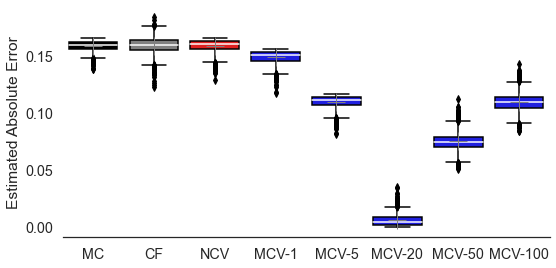

In [27]:

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.set(font_scale=1.3)
sns.set_style("white")
# Extract Saved Outputs
df_sort = pd.read_pickle("data_sarcos/fb_Sarcos_exp_DF_gammaprior_invest_insteps_with_CF.pkl")
my_pal = {"MC": "black", "NCV": "red", 'CF':"grey","MCV-1":"blue","MCV-5":"blue", "MCV-20":"blue", "MCV-50":"blue", "MCV-100":"blue"}
g=sns.catplot(x="method",
              y="est_abserr",
              hue="method",
              data=df_sort,
              kind="box",
              height=4,
              aspect=6/3,
              palette=my_pal,
              medianprops={'color':'white'},
              showmeans=True,
              meanprops={"marker": "+",
                         "linestyle": "--",
                         "color": "red",
                         "markeredgecolor": "grey",
                         "markersize": "18"},
              dodge =False
              )


(g.set_axis_labels("", "Estimated Absolute Error")
  .set_titles("{col_name}")
  .despine(left=True)
 )
plt.tight_layout()
plt.show()
# plt.savefig('fb_Sarcos_gammaprior_investinsteps2.pdf')